In [1]:
# Loading in libraries
import pandas as pd
import matplotlib.pyplot as plt
import spatial_efd
import math 
import signac
import numpy as np
import os.path
import os
import torch
import gpytorch
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import similaritymeasures
#from smt.sampling_methods import LHS
# Importing helper libraries for bayesian optimization
from dependencies.data_preprocessing_class import dataPreprocessing
from dependencies.gaussian_process_regression_class import gaussianProcessRegression
from dependencies.acquisition_functions_class import acqisitionFunctions
from dependencies.geometry_writer import geometryWriter
from dependencies.feature_extractor_4 import FeatureExtractor

In [3]:
print(np.linspace(151,152,2))

[151. 152.]


### Plotting error for sampled points using the acquisition function

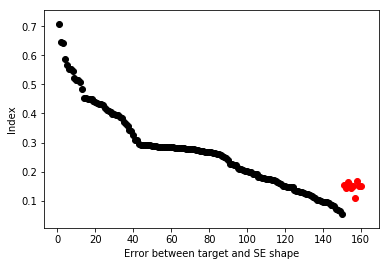

In [26]:
data_y = np.load('data_y.npy', )
error_train = data_y*-1
error_train_reshaped = np.reshape(error_train, (150,))
error_train_sorted = np.flip(np.sort(error_train_reshaped))
error_sampled = np.load('error_target_sampled.npy')

index_trained = np.linspace(1, 150, 150)
index_sampled = np.linspace(151,160,10)


plt.scatter(index_trained, error_train_sorted, color="black")
plt.scatter(index_sampled, error_sampled, color="red")
plt.xlabel("Error between target and SE shape")
plt.ylabel("Index")
plt.show()

### Plotting expected improvement vs model predicted error

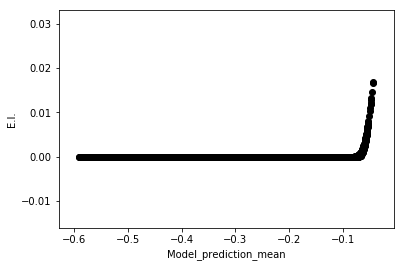

In [28]:
ei_sampled = np.load('ei.npy')
model_prediction_sampled = np.load('model_prediction_mean.npy')

plt.scatter(model_prediction_sampled, ei_sampled, color="black")
plt.ylabel("E.I.")
plt.xlabel("Model_prediction_mean")
plt.show()

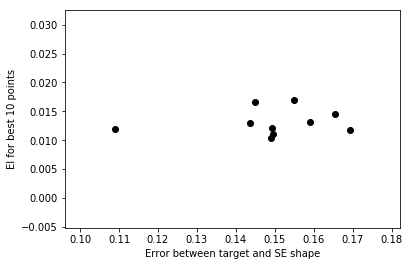

In [42]:
n_best_shapes = 10
ranking_ei = np.load('ranked.npy')
largest_indices = ranking_ei[::-1][:n_best_shapes]

ei_best = np.zeros((10,))

for i in range(10):
    ei_best[i] = ei_sampled[largest_indices[i]]
    
plt.scatter(error_sampled, ei_best, color="black")
plt.xlabel("Error between target and SE shape")
plt.ylabel("EI for best 10 points")
plt.show()